# **EDA y primer modelo - Grupo03**

> Bloque con sangría


### **Authors**
- César López Mantecón - 100472092
- Manuel Gómez-Plana Rodríguez - 100472310

### **Repositorio**
Esta práctica se ha llevado a cabo en [este repositorio de github](https://github.com/CLopMan/aprendizajeAutomatico-G03)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Índice**
...

## **Introducción**
En este *notebook* se recoge el Análisis de Datos Exploratorio (EDA, por sus siglas en inglés[1]) además de la selección del primer modelo. Comenzaremos por el EDA. Este proceso constará de los siguientes pasos: ajuste de datos, determinación de características e instancias, análisis de variables e instancias (existencia de valores nulos) y modelización del problema.

Tras el EDA, haremos un análisis de la evaluación *outer* e *inner* junto con la decisión de las métricas usadas. Luego, decidiremos el método de escalado más adecuado usando el KNN como algoritmo, para luego probar varios modelos para poder decidir cual es el mejor.

Ahora, comencemos con el EDA.

---

[1]: IBM, "Análisis de datos exploratorio". IBM. https://www.ibm.com/es-es/topics/exploratory-data-analysis (acceso: 28 de febrero de 2024)

# **Contexto del problema**

Creo que podría quedar bien decir qué pretendemos hacer, cuál es la variable objetivo y demás.

## **EDA - 1. Análisis preliminar**

Usaremos el módulo pandas para analizar los datos. Esto nos permitirá usar la herramienta de dataframes con el fin anterior. Primero, mostraremos las primeras y últimas filas del dataframe para hacernos una idea preliminar de los datos. Además, haremos un recuento de instancias para ver las dimensiones del conjunto de datos.


In [ ]:
import pandas as pd

#raw_data = pd.read_csv("wind_ava.csv.gz", compression='gzip') # lectura del fichero en bruto
raw_data = pd.read_csv("/content/drive/MyDrive/wind_ava.csv")
print(raw_data.head()) # primeras filas
print(raw_data.tail()) # últimas filas
print("========DIMENSIONES========")
print("nº filas = " + str(len(raw_data)) + "\nnº columnas = " + str(len(raw_data.columns)))

              datetime   energy     p54.162.1     p54.162.2     p54.162.3  \
0  2005-01-02 18:00:00   402.71  2.534970e+06  2.526864e+06  2.518754e+06   
1  2005-01-03 00:00:00   696.80  2.537369e+06  2.529277e+06  2.521184e+06   
2  2005-01-03 06:00:00  1591.15  2.533727e+06  2.525703e+06  2.517678e+06   
3  2005-01-03 12:00:00  1338.62  2.534491e+06  2.526548e+06  2.518609e+06   
4  2005-01-03 18:00:00   562.50  2.529543e+06  2.521623e+06  2.513702e+06   

      p54.162.4     p54.162.5     p54.162.6     p54.162.7     p54.162.8  ...  \
0  2.510648e+06  2.502537e+06  2.531111e+06  2.522721e+06  2.514330e+06  ...   
1  2.513088e+06  2.504995e+06  2.533465e+06  2.525088e+06  2.516716e+06  ...   
2  2.509654e+06  2.501629e+06  2.529801e+06  2.521496e+06  2.513187e+06  ...   
3  2.510670e+06  2.502732e+06  2.530569e+06  2.522346e+06  2.514127e+06  ...   
4  2.505782e+06  2.497861e+06  2.525621e+06  2.517421e+06  2.509215e+06  ...   

    v100.16   v100.17   v100.18   v100.19   v100.20   v1

Observamos que se trata de un conjunto de datos con **4748 instancias y 552 features** a priori numéricas. Para obtener más información del mismo haremos uso del método df.info() y del atributo df.dtypes.


In [ ]:
print(raw_data.info())
print(raw_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Columns: 552 entries, datetime to v100.25
dtypes: float64(551), object(1)
memory usage: 20.0+ MB
None
datetime      object
energy       float64
p54.162.1    float64
p54.162.2    float64
p54.162.3    float64
              ...   
v100.21      float64
v100.22      float64
v100.23      float64
v100.24      float64
v100.25      float64
Length: 552, dtype: object




Gracias a esta información, sabemos 551 de las 552 features son de tipo numérico (concretamente, números en coma flotante de doble precisión). Además, vemos que datetime es la única característica no numérica. No obstante, al modelar una marca de tiempo se podría convertir a numérica si fuera necesario. Observamos también que, a escepción de energy y datetime, las variables se pueden relacionar fácilmente con la localización a la que hacen referencia a través del nombre de la columna en el dataframe. Con esto, concluímos esta sección con un breve resumen de las conclusiones extraídas.

- El conjunto de datos cuenta con 4748 instancias.
- Cada instancia cuenta con 551 características del tipo numérico y un objeto str fácilmente convertible a numérico.
- Los datos están ligados a una localización fácilmente observada en el nombre de la columna.



## **EDA - 2.Ajuste y primer análisis de datos**

En este apartado haremos un pequeño preprocesado de los datos para eliminar la instancias que no son relevantes para el problema propuesto. Para ello, eliminaremos todos los datos que no hagan referencia a la localización "Sotavento". Además, volvemos a imprimir información sobre el dataframe transformado para observar los cambios después de esta operación.


In [ ]:
sotavento = raw_data.filter(regex='13$|energy|datetime') # eliminacion de instancias no referentes a Sotavento
print(sotavento.info())
print(sotavento.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

Comprobamos que este feature space es un espacio 24-dimensional con 4748 instancias. Al filtrar otras localizaciones hemos reducido drásticamente el número de variables a tener en cuenta. En la salida del código anterior también podemos observar que **no existen valores nulos en ninguna instancia** ya que el valor `Non-Null Count es igual al número de instancias para todas las variables [*].

[] *Nota: téngase en cuenta que, dependiendo del tamaño de la pantalla y el visualizador del notebook* la salida del código anterior puede haber sido truncada. Recomendamos copiar la salida a un visualizador de texto cualquiera para poder observarla sin problemas.*


## **EDA - 3. Análisis de variables e Instancias**

A continuación, estudiaremos el conjunto de datos para comprobar la existencia de relaciones entre variables, con el fin concer en profundidad el conjunto de datos, así como de de limpiarlo de variables que no sean relevantes para el estudio. Para ello, analizaremos en profundidad cada instancia con el fin de detectar valores atípicos y la existencia de correlación entre las mismas o con la variable objetivo. Primero, extraeremos un conjunto de estadísticas descriptivas del conjunto de datos:

In [ ]:
print(sotavento.describe())

            energy    p54.162.13   p55.162.13      cape.13    p59.162.13  \
count  4748.000000  4.748000e+03  4748.000000  4748.000000  4.748000e+03   
mean    693.126247  2.489477e+06    16.008810    31.166541  1.706692e+06   
std     665.531609  4.482599e+04     6.552216   121.758977  1.466953e+06   
min       0.010000  2.358748e+06     1.650268     0.000000  5.610341e+04   
25%     144.170000  2.458543e+06    11.203264     0.000000  6.563209e+05   
50%     465.305000  2.490478e+06    15.543441     1.004148  1.239176e+06   
75%    1089.375000  2.525134e+06    20.214077    14.143328  2.296548e+06   
max    2792.550000  2.580387e+06    39.230807  2311.662152  1.110694e+07   

         lai_lv.13    lai_hv.13      u10n.13      v10n.13         sp.13  ...  \
count  4748.000000  4748.000000  4748.000000  4748.000000   4748.000000  ...   
mean      2.815222     2.576284     0.386215     0.120528  97820.301287  ...   
std       0.397377     0.116434     3.100583     3.016766    713.689654  ..

En la tabla anterior podemos observar la media; desviación estándar; mínimo; valores del primer, segundo y tercer cuartil; y máximo de cada una de las features. Para complementar estos datos se han generado diferentes gráficos de cada variable para tener una idea de la distribución de los datos. Para la generación de gráficas nos valdremos de los módulos `mathplotlib` y `seaborn`.

Dado que es un set de datos temporales es interesante observar el conjunto de datos que tenemos para cada año. Observamos en el siguiente gráfico que tenemos una gran cantidad de datos entre 2005 y 2007; unos pocos datos de 2008 y bastantes datos de 2009.

<Axes: xlabel='datetime'>

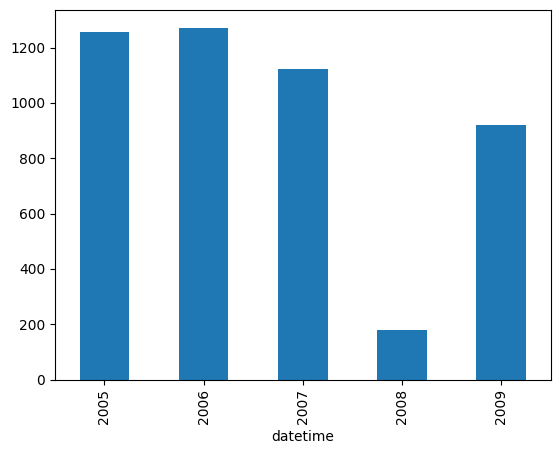

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

aux = pd.DataFrame()


(sotavento['datetime'].astype("datetime64[ns]")).groupby(sotavento['datetime'].astype("datetime64[ns]").dt.year).count().plot(kind='bar', legend=False)

### Diagramas de dispersión respecto a la variable objetivo
Para tener una primera idea de la relación de las variables con la variable objetivo se representan a continuación un diagrama de dispersión de la variable objetivo con respecto a los demás atributos.



<ipython-input-9-fff90e3ffb79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sotavento["datetime"] = pd.to_datetime(sotavento["datetime"]).astype(int)


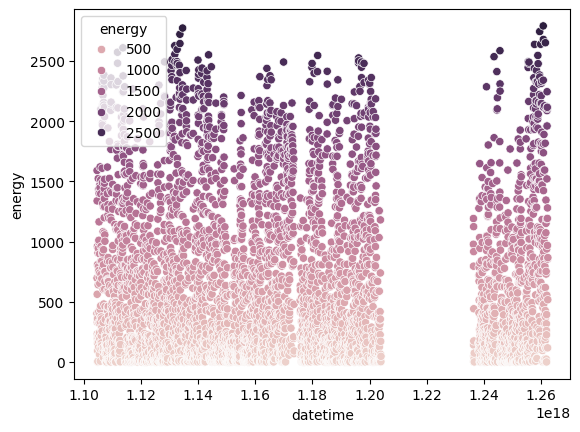

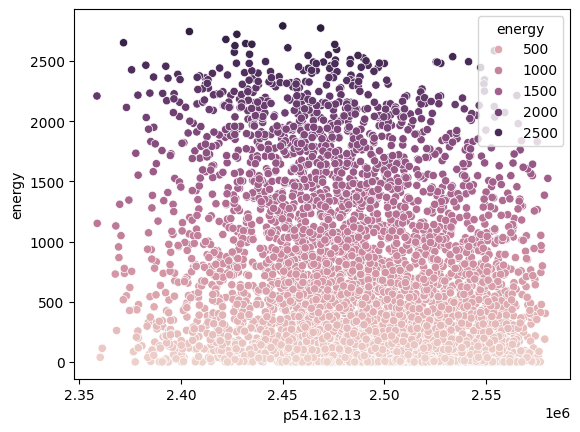

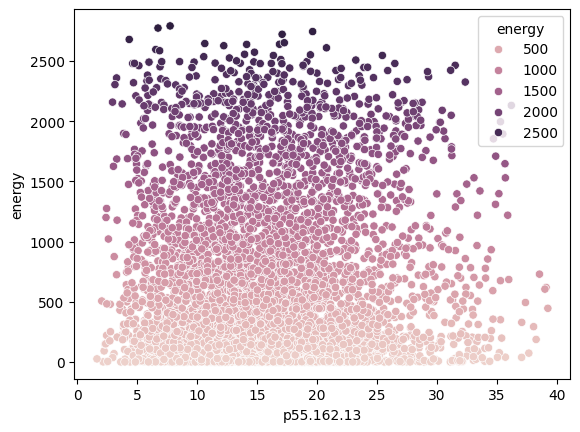

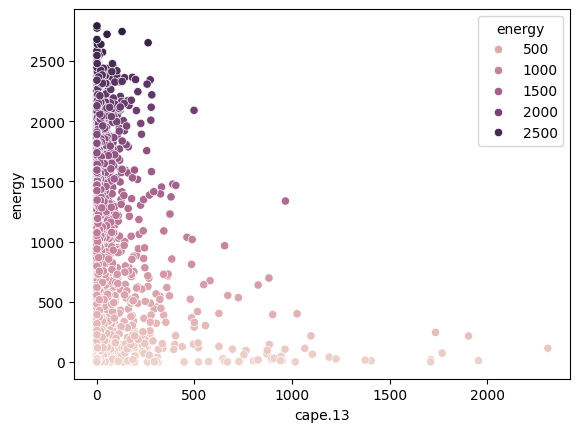

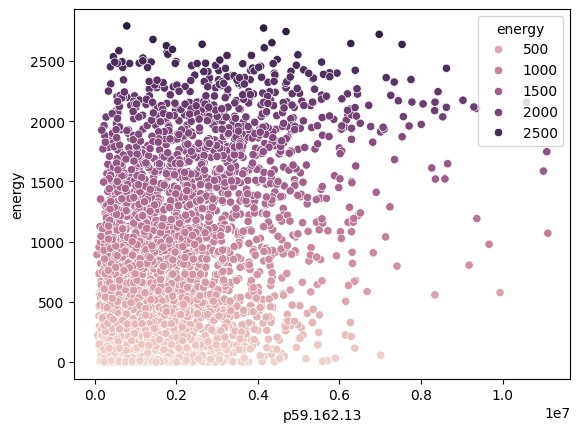

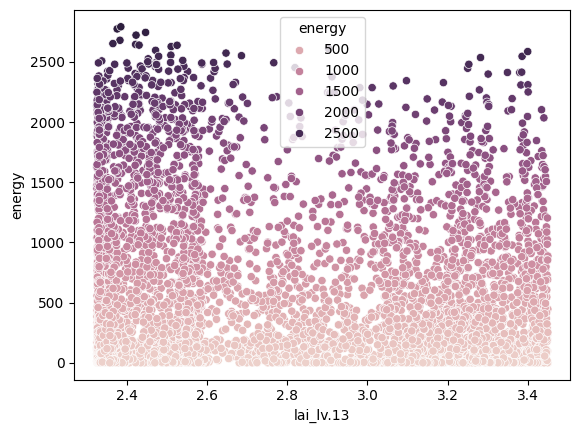

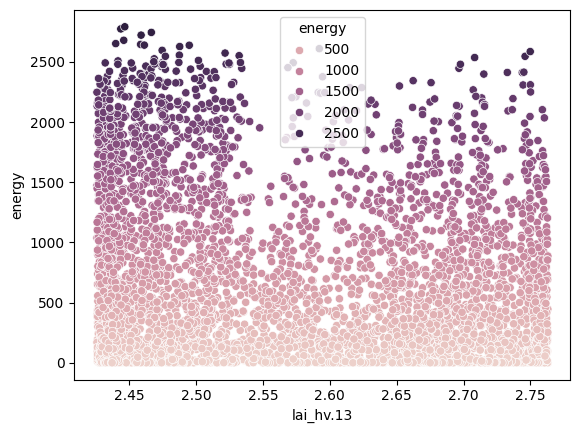

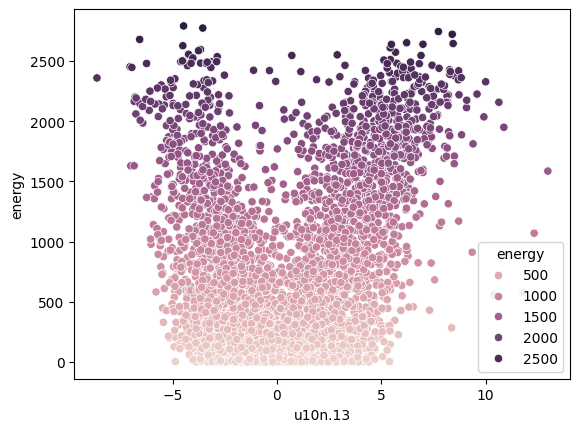

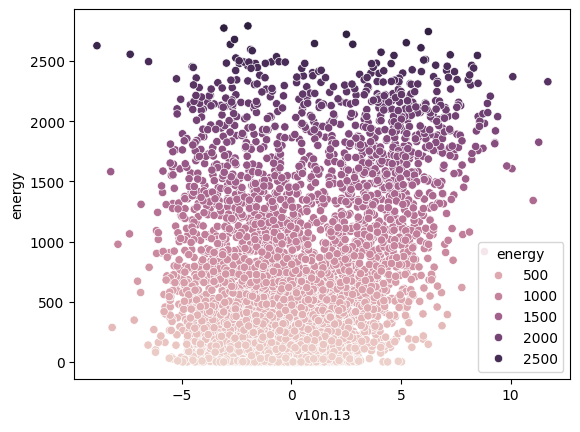

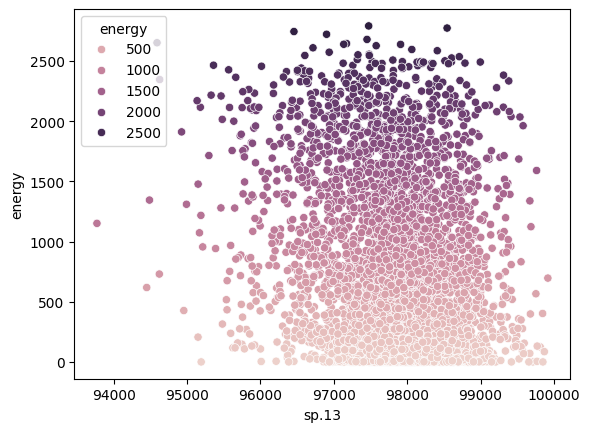

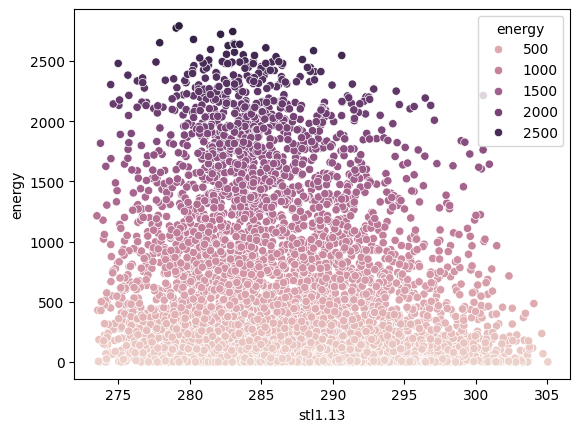

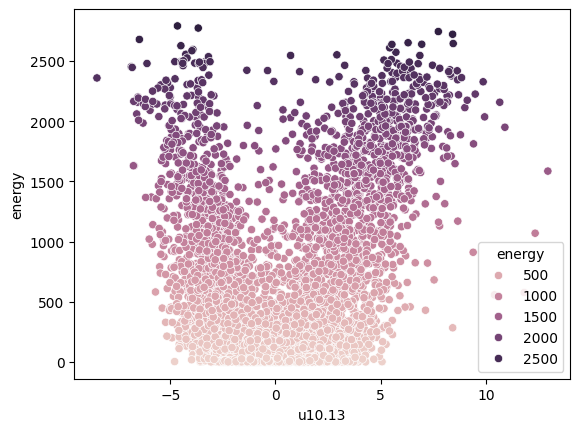

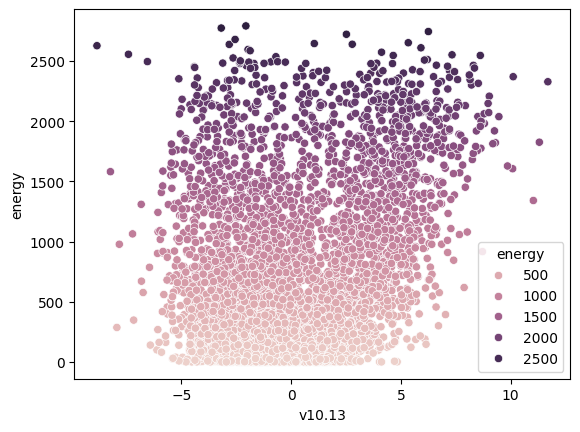

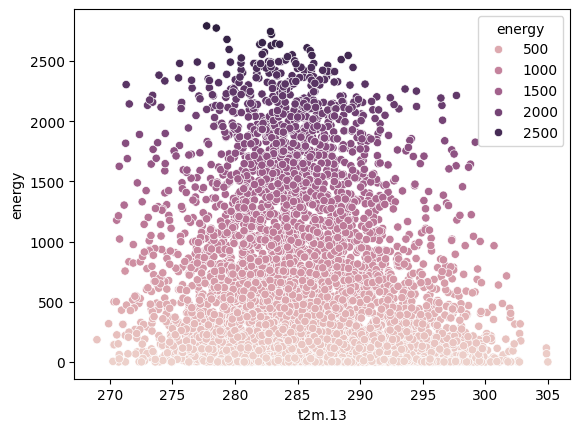

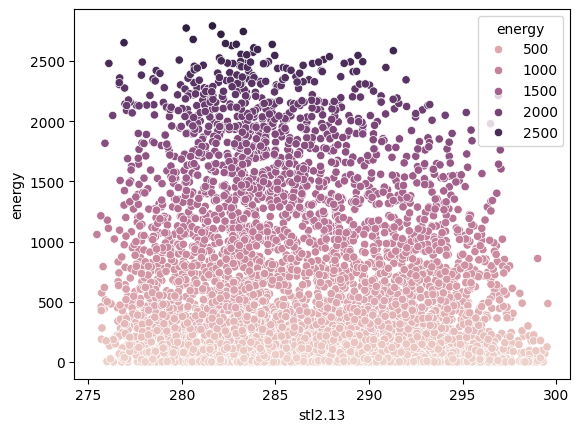

KeyboardInterrupt: 

In [ ]:
eng = "energy"

sotavento["datetime"] = pd.to_datetime(sotavento["datetime"]).astype(int)
abcisas = sotavento.columns[sotavento.columns != eng]


for i, v in enumerate(abcisas):
    if v == "datetime":
        plt.figsize = (20, 20)
    else:
        plt.figsize=(12, 10)

    sns.scatterplot(data=sotavento, x=v, y=eng, hue=eng)
    plt.show()

### **Matriz de correlaciones**

Con el siguiente código podemos obtener una matriz de correlaciones entre todas las variables. Podemos observar que existen varias correlaciones altas en el conjunto de datos.

In [ ]:
plt.figure(figsize=(15, 9))

columns = list(sotavento.columns)
sns.heatmap(sotavento.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

### **Diagramas de dispersión**

Dado que existen correlaciones verdaderamente altas, representaremos un diagrama de dispersión entre pares de variables con correlación superior a
en valor absoluto.

In [ ]:
corr = sotavento.corr()
plt.figsize=(12, 10)
for row in range(len(sotavento.columns)):
    for col in range(len(sotavento.columns)):
        if (col > row and corr.iloc[row, col] > 0.9):
            sns.scatterplot(data=sotavento, x=sotavento.columns[row], y=sotavento.columns[col], hue=sotavento.columns[col])
            plt.show()


### **Existencia de columnas constantes**

Para comprobar la existencia de columnas constantes. Debido a la naturaleza de los datos, se considerará que dos valores son distintos si difieren en más de un 1% del valor más grande. A través del siguiente código vemos que **no existen columnas constantes**.

In [ ]:
for j in range(0, 1, 1):
 same_date = True
 i = 0
 while(same_date and i < len(sotavento)-1):
  if (sotavento.iloc[i, j] != sotavento.iloc[i+1,j]):
   same_date = False
  i += 1
 if same_date:
  print("The datetime values", str(j), "are constant.")

for j in range(1, len(sotavento.columns), 1):
 same = True
 i = 0
 while (same and i < len(sotavento)-1):
  if (sotavento.iloc[i+1, j] < 0.99*sotavento.iloc[i, j] or sotavento.iloc[i+1,j] > 1.01*sotavento.iloc[i,j]):
   same = False
  i += 1
 if same:
  print("The values of the column", str(j), "are constant.")

## **EDA - 4.Tipo de problema**
Tras estos análisis, debemos instanciar este problema como un problema de **Clasificación** o de **Regresión**. Lo primero que debemos saber para realizar esta clasificación, es saber la variable que tenemos que predecir, es decir, **energía**. Con los bloques de código anteriores, hemos visto que la energía es un valor discreto, por lo que podemos asumir que el modelo intenta resolver un problema de **Regresión**.

Por esto, podemos decir, adicionalmente, que al estimar un valor según unas variables, se trata de un problema del tipo aprendizaje **atributo-valor**. Además, como tenemos los valores de **energía**, podemos decir que se trata de un problema de aprendizaje supervisado.

Una vez finalizado con el EDA, abordaremos el diseño y elección del modelo en el siguiente apartado.



# **Modelo - 1.Evaluaciones *outer* e *inner* y métricas**
En este apartado, decidiremos como llevar a cabo las evaluaciones *outer* e *inner* sobre nuestros datos. Además, pensaremos en las métricas de evaluación que usaremos para estimar el éxito de nuestro modelo.

## **Elección de hiperparámetros: evaluación inner**

El bucle inner seguirá una estrategia de crossvalidation con time-series split para la elección de hiperparámetros.

## **Estimación del rendimiento del modelo: evaluación outer**

La estimación del rendimiento del modelo será de tipo holdout. Los datos de 2008 y 2009 serán separados para tests y realizaremos la fase de entrenamiento con datos anteiriores a esas fechas

## **Evaluaciones *outer* e *inner***

Lo primero a decidir para el modelo es como realizaremos las evaluaciones *inner* y *outer* para poder elegir los mejores hiperparámetros. Para ello, tenemos que pensar en los datos que tenemos.

Sabemos que tenemos que predecir un valor discreto, **energía**, y que los datos están ordenados cronológicamente, lo cual es muy importante para decidir la evaluación *outer*. Debido a su orden, la mejor opción para realizar la evaluación outer es dividir los datos usando un *time-split*.

Esto se debe a que queremos los datos de un año para predecir los siguientes, datos que están muy correlados entre sí, y un *cross-validator* que haga un split de los datos según series temporales es el que mejor se adecúa a esta situación. Si queremos hacer una métrica más exacta, será mejor dividir entre meses, pero eso lo decidiremos en la implementación del modelo.

## **Métricas para la evaluación**
Para poder realizar la estimación de la forma más adecuada, es necesario tener en cuenta que el problema es un problema de *Regresión*. Sabiendo esto, debemos elegir una métrica que tenga en cuenta la distancia entre el punto predicho y el punto real.

Hay múltiples opciones que podemos considerar:

- Mean Squared Error (MSE)
- Mean Absolure Error (MAE)
- Rooted Mean Squared Error (RMSE)

Dada la resistencia del MAE a los valores mal predichos, e incluso a los outliers, parece ser la opción más robusta. Además, para evitar el problema de la escala de la variable respuesta, usaremos un regresor de tipo *dummy*, con el cual comparar las predicciones que hagamos, es decir. Al usar el *MAE* como métrica, debemos usar el *Median dummy regressor*, el cual usará la mediana de la variable respuesta.

# **División entre train y test**

Antes de elegir el método de escalado, es necesario hacer la partición *outer* del dataset. Para ello, usaremos un for para contar el número de instancias entre 2008 y 2009, para así poder hacer una efectiva partición.

In [ ]:
from sklearn.model_selection import train_test_split

size = 0

res = pd.to_datetime(sotavento["datetime"], unit='ns').astype(str)

for ind, data in res.items():
  if data.startswith("2008") or data.startswith("2009"):
    size += 1

print("Hay", str(size), "instancias de 2008 y 2009")

# Se obtienen los datos
train, test = train_test_split(sotavento, test_size=size, shuffle=False)

X_train = train.drop(["energy", "datetime"], axis="columns")
Y_train = train[["energy"]]
X_test = test.drop(["energy", "datetime"], axis="columns")
Y_test = test[["energy"]]

Hay 1099 instancias de 2008 y 2009


# **Método de escalado**

Para elegir el método de escalado, usaremos el RAE, Relative Absolute Error, con un KNN cuyos hiperparámetros sean los que vienen por defecto. De esta manera, obtendremos una predicción para ver cual es el mejor *scaler*, y poder usarlo después.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

knn = KNeighborsRegressor()
tss = TimeSeriesSplit(n_splits=3)
dummy = DummyRegressor(strategy="median")

for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
  # Se crea la pipe
  pipe = Pipeline([
      ('scaler', scaler),
      ('knn', knn)
  ])

  # Se entrena el modelo
  scores = cross_val_score(pipe, X_train, Y_train, cv=tss, scoring="neg_mean_absolute_error")
  scores = -scores

  # Se entrena el dummy
  dummy.fit(X_train, Y_train)
  dummy_pred = dummy.predict(X_test)
  dummy_mae = metrics.mean_absolute_error(Y_test, dummy_pred)
  rae = scores / dummy_mae

  print("Usando", str(scaler))
  print("MAE:", str(scores.mean()), "- RAE:", str(rae.mean()), "\n")

Usando StandardScaler()
MAE: 335.61925584795324 - RAE: 0.6226784957650443 

Usando MinMaxScaler()
MAE: 359.83607529239765 - RAE: 0.667608256025021 

Usando RobustScaler()
MAE: 340.89428947368424 - RAE: 0.6324653299408171 




# KNN
## KNN simple

In [ ]:
from time import time

start = time()

# Se crean los regresores y el split
knn = KNeighborsRegressor()
tss = TimeSeriesSplit(n_splits=3)
dummy = DummyRegressor(strategy="median")

# Se crea la pipeline
pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('knn', knn)
      ])

# Se calcula el MAE
scores = cross_val_score(pipe, X_train, Y_train, cv=tss, scoring="neg_mean_absolute_error")
scores = -scores

# Se calcula el RAE
dummy.fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)
dummy_mae = metrics.mean_absolute_error(Y_test, dummy_pred)
rae = scores / dummy_mae

print("MAE:", str(scores.mean()), "- RAE:", str(rae.mean()), "\n")
print("Tiempo de ejecución:", str(time()-start))

MAE: 335.61925584795324 - RAE: 0.6226784957650443 

Tiempo de ejecución: 0.07902312278747559


## KNN con HPO

In [1]:
from sklearn.model_selection import GridSearchCV

start = time()
# Se crean los regresores y el split
knn = KNeighborsRegressor()
tss = TimeSeriesSplit(n_splits=3)
dummy = DummyRegressor(strategy="median")

# Se crea la pipeline
pipe = Pipeline([
      ('scaler', scaler),
      ('knn', knn)
      ])

# Se crean los parametros
param_grid = {"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              "knn__weights": ["uniform", "distance"],
              "knn__algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

# Se calcula los parámetros
grid = GridSearchCV(pipe, param_grid, cv=tss, scoring="neg_mean_absolute_error")
grid.fit(X_train, Y_train)
print("Los mejores parámetros son:\n", grid.best_params_, "\n")

# Se calcula el MAE
y_pred = grid.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, y_pred)

# Se calcula el RAE
dummy.fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)
mae_dummy = metrics.mean_absolute_error(Y_test, dummy_pred)
rae = mae / mae_dummy

print("MAE:", str(mae), "- RAE:", str(rae))
print("Tiempo de ejecución:", str(time()-start))

NameError: name 'time' is not defined